In [53]:
%load_ext autoreload
%autoreload 2

import sys,json
from glob import glob
from ROOT import TFile, gROOT, TChain, TH1
import numpy as np
import math

# from auxiliaryFunctions import getSortedClusterIndexes, getMatchedIndexes, getCellsInWindowCustomSizeNEW, unpackCellsFromCluster
# from getXTDataAsPythonDict import getDictForAnalysis

# sys.path.insert(1, '/home/mhufnage/ATLAS_QT_XTALK/xtalkDatasetAnalysis')

# from ATLAS_Ntuple_reader import ATLAS_NTuple_Reader
# from getXTDataAsPythonDict import getDictForAnalysis, getXTDataAsPythonDictFasterClean
from ATLAS_Ntuple_reader import ATLAS_NTuple_Reader, ATLAS_NTuple_Event_Reader

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import matplotlib
# plt.style.use([hep.style.ATLAS])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# All dataset

In [5]:
fDict       = open('dictCaloByLayer.json')
caloDict    = json.load(fDict)

#---------------------------------------------
#----------   Read the ROOT trees   ----------
#---------------------------------------------
total_events        = -1 #nClusters to being user to train the model
isMC                = False
getMLDataset        = False
isTagAndProbe       = True # dump reconstructed Z boson branches
bFullWindows        = True # use only full windows from clusters
electronPtCut       = 0    # GeV, for ML dataset
clusName            = 'topocluster'
layer               = 'EMB2'


datasetPath = '/data/atlas/mhufnage/xtalk/dataset/'
datasets    = [
    'user.mhufnage.xtalk_dumper.data17_13TeV.00329542.physics_MinBias.ntuple.v0/',
    'user.mhufnage.xtalk_dumper.ZeeTP.data17_13TeV.00329542.physics_MinBias.ntuple.v0_XYZ.root.tgz/,'
    'user.mhufnage.xtalk_dumper.mc16_13TeV.361106.Zee.ntuple.v0_XYZ.root.tgz/',
    'user.mhufnage.xtalk_dumper.ZeeTP.mc16_13TeV.361106.Zee.ntuple.v0_XYZ.root.tgz/',
]


fileNames = glob(datasetPath+'dumper_minBias*.root')

confDict = {
    'total_events'          : total_events, # if its on Cluster_mode, num_clusters = total_events
    'isMC'                  : isMC,
    'isTagAndProbe'         : isTagAndProbe,
    'electronPtCut'         : electronPtCut, # GeV,  ML Dataset
    'dumpRawChForMLStudies' : True,
    'sampling'              : layer,   # ML Dataset
    'nCellsWinEta'          : 3,    # ML Dataset
    'nCellsWinPhi'          : 3,    # ML Dataset
    'datasetPath'           : datasetPath,
    'calibType'             : 'dumper',     # name of the type of calibration, to differentiate from offline or database (analysis/debug) options: 'database' or 'typical'
    'clusName'              : clusName,     # 'topocluster' or '7x11'
    'bFullWindows'          : bFullWindows,         # use only full windows from clusters
    'bPedFromDB'            : True,         # Ped from DB (TRUE) or from Script (FALSE)
    'bDoOfflineCalib'       : False,    # ML Dataset
    'typeThreshold'         : 'EneThr', # Energy Threshold type for DSP timing estimation. 'fixedValue', 'EneThr','NoiseSigma'
    'bAbsDSPE1'             : False, # ~X~ use abs(E) to get E1, and compare to E_thr
    'bPerfomQuant'          : False, # ~X~ apply the quantized form of energy and time estimation (like DSP)
    'applyCteQuant'         : False, # ~X~ True # apply quantization to the alpha, beta, Pa, Pb. If False, use likeDSP function, but full precision constants.
    'reorderSamp'           : False, # ~X~ reorder samples like-dsp
    'fileNames'             : fileNames
}

# fileNames   = glob(datasetPath)

dataset = ATLAS_NTuple_Reader(confDict, getMLDataset=getMLDataset)
print(len(dataset))

# datasetName     = 'dataset_{}_ptCut{}_{}_sampWin{}-{}_nClus{}.npz'.format(datasetAlias, el_thr, clusName, nCellsWinEta, nCellsWinPhi, clus_counter)
datasetName = datasetPath+'test_MC.npz'
np.savez(datasetName,dataset=dataset)

25 files were added with 359 events.
event 0...


359


Warning in <TTree::SetBranchStatus>: No branch name is matching wildcard -> cluster711_*
Warning in <TTree::SetBranchStatus>: No branch name is matching wildcard -> cluster711_*
Warning in <TTree::SetBranchStatus>: No branch name is matching wildcard -> cluster711_*
Warning in <TTree::SetBranchStatus>: No branch name is matching wildcard -> cluster711_*
Warning in <TTree::SetBranchStatus>: No branch name is matching wildcard -> cluster711_*
Warning in <TTree::SetBranchStatus>: No branch name is matching wildcard -> cluster711_*
Warning in <TTree::SetBranchStatus>: No branch name is matching wildcard -> cluster711_*
Warning in <TTree::SetBranchStatus>: No branch name is matching wildcard -> cluster711_*
Warning in <TTree::SetBranchStatus>: No branch name is matching wildcard -> cluster711_*
Warning in <TTree::SetBranchStatus>: No branch name is matching wildcard -> cluster711_*
Warning in <TTree::SetBranchStatus>: No branch name is matching wildcard -> cluster711_*
Warning in <TTree::Se

In [6]:
mass = []
T=[]
for ev in dataset:
    mass.append(ev['dataset']['ZeeTP']['mass'][0])
    T.append(ev['dataset']['ZeeTP']['T'][0])

In [9]:
plt.hist(np.concatenate(mass).ravel().tolist(), bins=30)

(array([60., 67., 55., 51., 32., 37., 43., 38., 16., 16., 22., 12., 27.,
        10., 19., 17., 16., 19.,  8., 10., 10.,  0., 18.,  2.,  6.,  4.,
         4.,  5., 14.,  4.]),
 array([ 66065.43759834,  67698.40927634,  69331.38095434,  70964.35263234,
         72597.32431033,  74230.29598833,  75863.26766633,  77496.23934433,
         79129.21102233,  80762.18270033,  82395.15437832,  84028.12605632,
         85661.09773432,  87294.06941232,  88927.04109032,  90560.01276832,
         92192.98444631,  93825.95612431,  95458.92780231,  97091.89948031,
         98724.87115831, 100357.84283631, 101990.8145143 , 103623.7861923 ,
        105256.7578703 , 106889.7295483 , 108522.7012263 , 110155.6729043 ,
        111788.64458229, 113421.61626029, 115054.58793829]),
 <BarContainer object of 30 artists>)

In [12]:
import atlasplots

In [14]:
atlasplots.set_atlas_style()

ROOT.THist()

Applying ATLAS style settings


NameError: name 'ROOT' is not defined

# Event by Event + ROOT

In [8]:
fDict       = open('dictCaloByLayer.json')
caloDict    = json.load(fDict)

#---------------------------------------------
#----------   Read the ROOT trees   ----------
#---------------------------------------------
total_events        = -1 #nClusters to being user to train the model
nCellsWinEta        = 3
nCellsWinPhi        = 3
bFullWindows        = True # use only full windows from clusters
electronPtCut       = 0    # GeV, for ML dataset
clusName            = 'topocluster'
layer               = 'EMB2'


datasetPath = '/data/atlas/mhufnage/xtalk/dataset/'

datasets    = [
    datasetPath+'user.mhufnage.xtalk_dumper.data17_13TeV.00329542.physics_MinBias.ntuple.v0/',
    datasetPath+'user.mhufnage.xtalk_dumper.ZeeTP.data17_13TeV.00329542.physics_MinBias.ntuple.v0_XYZ.root.tgz/',
    datasetPath+'user.mhufnage.xtalk_dumper.mc16_13TeV.361106.Zee.ntuple.v0_XYZ.root.tgz/',
    datasetPath+'user.mhufnage.xtalk_dumper.ZeeTP.mc16_13TeV.361106.Zee.ntuple.v0_XYZ.root.tgz/',
]
isMC            = [False, False, True, True]
isTagAndProbe   = [False, True, False, True]

for getMLDataset in [False, True]:
    
    if not getMLDataset:
        datasetAlias    = [
            'data17_singleElec_full_',
            'data17_ZeeTP_full_',
            'mc16_singleElect_full',
            'mc16_ZeeTP_full']
    else:
        datasetAlias    = [
            'data17_singleElec_ML_',
            'data17_ZeeTP_ML_',
            'mc16_singleElect_ML_',
            'mc16_ZeeTP_ML_']

    for dsIndex, dsName in enumerate(datasets):
        print('Dataset alias: {}'.format(datasetAlias[dsIndex]))
        fileNames = glob(dsName+'dumper_minBias*.root')

        confDict = {
            'total_events'          : total_events, # if its on Cluster_mode, num_clusters = total_events
            'isMC'                  : isMC[dsIndex],
            'isTagAndProbe'         : isTagAndProbe[dsIndex],
            'electronPtCut'         : electronPtCut, # GeV,  ML Dataset
            'dumpRawChForMLStudies' : True,
            'sampling'              : layer,   # ML Dataset
            'nCellsWinEta'          : 3,    # ML Dataset
            'nCellsWinPhi'          : 3,    # ML Dataset
            'datasetPath'           : datasetPath,
            'calibType'             : 'dumper',     # name of the type of calibration, to differentiate from offline or database (analysis/debug) options: 'database' or 'typical'
            'clusName'              : clusName,     # 'topocluster' or '7x11'
            'bFullWindows'          : bFullWindows,         # use only full windows from clusters
            'bPedFromDB'            : True,         # Ped from DB (TRUE) or from Script (FALSE)
            'bDoOfflineCalib'       : False,    # ML Dataset
            'typeThreshold'         : 'EneThr', # Energy Threshold type for DSP timing estimation. 'fixedValue', 'EneThr','NoiseSigma'
            'bAbsDSPE1'             : False, # ~X~ use abs(E) to get E1, and compare to E_thr
            'bPerfomQuant'          : False, # ~X~ apply the quantized form of energy and time estimation (like DSP)
            'applyCteQuant'         : False, # ~X~ True # apply quantization to the alpha, beta, Pa, Pb. If False, use likeDSP function, but full precision constants.
            'reorderSamp'           : False, # ~X~ reorder samples like-dsp
            'fileNames'             : fileNames
        }

        if isMC:
            print('The input files are from ATLAS_MC!')
        else:
            print('The inputs are from collision data!')
        
        sTree   = TChain("dumpedData",'')
        for file in fileNames:
            sTree.Add(file+"/dumpedData") # main dumped data tree (event by event)
        
        nEvents = sTree.GetEntries()
        print("{} files were added with {} events.".format(len(fileNames),nEvents))
        
        #
        # Loop over events
        #
        for eventNumber, event in enumerate(sTree):
            if (eventNumber > total_events) and (total_events != -1):
                break
            
            if not (eventNumber % 5000):
                print('event {}...'.format(eventNumber))

            data = ATLAS_NTuple_Event_Reader(event, confDict, getMLDataset=getMLDataset)
            
            if data==0:
                continue
            
        # print('Dataset {} size:{}.'.format(datasetAlias[dsIndex], len(dataset)))
        
        # if getMLDataset:
        #     datasetName     = 'dataset_{}ptCut{}_{}_sampWin{}-{}_nClus{}.npz'.format(datasetAlias[dsIndex], electronPtCut, clusName, nCellsWinEta, nCellsWinPhi,  len(dataset))
        #     confName        = 'config_{}ptCut{}_{}_sampWin{}-{}_nClus{}.npz'.format(datasetAlias[dsIndex], electronPtCut, clusName, nCellsWinEta, nCellsWinPhi,  len(dataset))
        # else:
        #     datasetName     = 'dataset_{}_{}_nEvents{}.npz'.format(datasetAlias[dsIndex], clusName, len(dataset))
        #     confName        = 'config_{}_{}_nEvents{}.npz'.format(datasetAlias[dsIndex], clusName, len(dataset))
        
        # np.savez(datasetPath+datasetName,dataset=dataset)
        # np.savez(datasetPath+confName,dataset=confDict)

Dataset alias: data17_singleElec_full_
The input files are from ATLAS_MC!
26 files were added with 3098035 events.
event 0...
Dataset alias: data17_ZeeTP_full_
The input files are from ATLAS_MC!
25 files were added with 359 events.
event 0...
Dataset alias: mc16_singleElect_full
The input files are from ATLAS_MC!
12 files were added with 5028056 events.
event 0...
Dataset alias: mc16_ZeeTP_full
The input files are from ATLAS_MC!
11 files were added with 1182180 events.
event 0...
Dataset alias: data17_singleElec_ML_
The input files are from ATLAS_MC!
26 files were added with 3098035 events.
event 0...
Dataset alias: data17_ZeeTP_ML_
The input files are from ATLAS_MC!
25 files were added with 359 events.
event 0...
Dataset alias: mc16_singleElect_ML_
The input files are from ATLAS_MC!
12 files were added with 5028056 events.
event 0...
Dataset alias: mc16_ZeeTP_ML_
The input files are from ATLAS_MC!
11 files were added with 1182180 events.
event 0...


# ATLAS Plots

In [54]:
from __future__ import absolute_import, division, print_function

import array

import sys,json, os
from glob import glob
from time import time
import numpy as np

import ROOT as root
root.TH1I.AddDirectory(False)
from ROOT import TCanvas, TPad, TH1F,TH2F,TH3F, TH1I, TFile,TLine,TGraph, TGraph2D, TGraphErrors, gStyle, THStack
from ROOT import TLatex, gPad, TLegend
from ROOT import kRed, kBlue, kBlack,TLine,kBird, kOrange,kGray, kYellow, kViolet, kGreen, kAzure

root.TH1D.AddDirectory(False)
root.TH1F.AddDirectory(False)
root.TH1I.AddDirectory(False)

import atlasplots as astyle

from helper_lib.functionsHelper import stdVecToArray, stdVecOfStdVecToArrayOfList, stdVecOfStdVecToPlainCPPArray
from helper_lib.auxiliaryFunctions import human_format
from root_plots_lib.root_plots_helper import fillTH1AndUpdateRange, createDictOfTH1ForWholeTree, createDictOfTH1ForTreeSelection


os.getcwd()

'/home/mhufnage/ATLAS_QT_XTALK/xtalkDatasetAnalysis'

# Plot all NTuples

In [85]:

if __name__=='__main__':
    #---------------------------------------------
    #----------   Read the ROOT trees   ----------
    #---------------------------------------------
    total_events        = 10 #nClusters to being user to train the model
    getMLDataset        = False
    electronPtCut       = 0    # GeV, for ML dataset
    clusName            = 'topocluster'
    layer               = 'EMB2'


    datasetPath = '/data/atlas/mhufnage/xtalk/dataset/'

    datasets    = [
        datasetPath+'user.mhufnage.xtalk_dumper.data17_13TeV.00329542.physics_MinBias.ntuple.v0/',
        datasetPath+'user.mhufnage.xtalk_dumper.ZeeTP.data17_13TeV.00329542.physics_MinBias.ntuple.v0_XYZ.root.tgz/',
        datasetPath+'user.mhufnage.xtalk_dumper.mc16_13TeV.361106.Zee.ntuple.v0_XYZ.root.tgz/',
        datasetPath+'user.mhufnage.xtalk_dumper.ZeeTP.mc16_13TeV.361106.Zee.ntuple.v0_XYZ.root.tgz/',
    ]
    isMC             = [False, False, True, True]
    isTagAndProbe    = [False, True, False, True]
    branchCategories = ['event', 'clusters', 'cells', 'channels', 'rawChannels', 'particles']

    for branchCategory in branchCategories:#, True]:
        
        datasetAlias    = [
            'data17_singleElec_full_{}'.format(branchCategory),
            'data17_ZeeTP_full_{}'.format(branchCategory),
            'mc16_singleElect_full_{}'.format(branchCategory),
            'mc16_ZeeTP_full_{}'.format(branchCategory)]

        for dsIndex, dsName in enumerate(datasets):
            # totalTimeInit = time()
            print('Dataset alias: {}'.format(datasetAlias[dsIndex]))
            
            fileNames = glob(dsName+'dumper_minBias*.root')

            if isMC[dsIndex]:
                print('The input files are from ATLAS_MC!')
            else:
                print('The inputs are from collision data!')
            
            sChain   = root.TChain("dumpedData",'')
            for file in fileNames:
                sChain.Add(file+"/dumpedData") # main dumped data tree (event by event)
            
            nEvents = sChain.GetEntries()
            print("{} files were added with {} events.".format(len(fileNames),human_format(nEvents)))

            #
            # Loop over events
            #
            # hists = createDictOfTH1ForWholeTree(sChain)
            hists = createDictOfTH1ForTreeSelection(sChain, branchCategory=branchCategory)
            
            initTime = time()
            for eventNumber, event in enumerate(sChain):
                if not (eventNumber % 100000):
                    print('event {}'.format(eventNumber))
                if (eventNumber > total_events) and (total_events != -1):
                    break
                    
                for branchIndex, branchKey in enumerate(sChain.GetListOfBranches()):
                    
                    branchName = branchKey.GetName()
                    
                    if not sChain.GetBranchStatus(branchName):
                        continue
                    
                    branchValue = getattr(event, branchName)

                    if 'event' in branchName:
                        fillTH1AndUpdateRange(hists[branchName], branchValue )
                        
                    elif any(brName in branchName for brName in ['digit', 'OFCa', 'OFCb', 'shape', 'chInfo']):
                        if branchValue.size() !=0:
                            # newValue = np.concatenate(branchValue).astype(np.float) # too slow!
                            newValue = stdVecOfStdVecToPlainCPPArray(branchValue) # way faster!! (but this one dont care by ordering)
                            fillTH1AndUpdateRange(hists[branchName],  newValue)
                    else:
                        if branchValue.size() !=0:
                            newValue = stdVecToArray(branchValue).astype(np.float)
                            fillTH1AndUpdateRange(hists[branchName],  newValue)

            finalTime = time()
            
            print("{} branches and {} events processed. Total time: {:.4}mins ({:.4}s/event).".format(len(hists.keys()), human_format(eventNumber-1),(finalTime-initTime)/60, (finalTime-initTime)/eventNumber))
            
            sChain.Reset()
            # totalTimeFinal = time()
            
            rootFile = root.TFile(datasetPath+'histograms/'+datasetAlias[dsIndex]+'.root', "RECREATE") 
            # newTree  = root.TTree("tree", "Contains the histograms ")
            print('Storing histograms into RootFile...')
            for histBranch in hists.keys():
                # automaticTH1Rebinning(hists[histBranch], 100)
                hists[histBranch]['hist'].Write()
            rootFile.Close()
            hists = None

Dataset alias: data17_singleElec_full_
The inputs are from collision data!
26 files were added with 3.10M events.
Selected branches are from cells, with 13 out of total 87 branches.
event 0
13 branches and 10.00 events processed. Total time: 0.001166mins (0.006358s/event).
Storing histograms into RootFile...
Dataset alias: data17_ZeeTP_full_
The inputs are from collision data!
25 files were added with 359.00 events.
Selected branches are from cells, with 13 out of total 95 branches.
event 0
13 branches and 10.00 events processed. Total time: 0.001586mins (0.008653s/event).


Storing histograms into RootFile...
Dataset alias: mc16_singleElect_full
The input files are from ATLAS_MC!
12 files were added with 5.03M events.
Selected branches are from cells, with 23 out of total 109 branches.
event 0
23 branches and 10.00 events processed. Total time: 0.01389mins (0.07574s/event).
Storing histograms into RootFile...
Dataset alias: mc16_ZeeTP_full
The input files are from ATLAS_MC!
11 files were added with 1.18M events.
Selected branches are from cells, with 23 out of total 117 branches.
event 0
23 branches and 10.00 events processed. Total time: 0.002455mins (0.01339s/event).
Storing histograms into RootFile...


In [49]:
for br in sChain.GetListOfBranches():
    print(br.GetName())
    # print(br.GetClassName())
    # print(br.GetName(),sChain.GetBranchStatus(br.GetName()))


event_RunNumber
event_EventNumber
event_BCID
event_Lumiblock
event_avg_mu_inTimePU
event_avg_mu_OOTimePU
cluster_index
c_electronIndex_clusterLvl
cluster_et
cluster_time
cluster_pt
cluster_eta
cluster_phi
cluster_index_cellLvl
cluster_cell_index
cluster_cell_caloGain
cluster_cell_layer
cluster_cell_region
cluster_cell_energy
cluster_cell_time
cluster_cell_eta
cluster_cell_phi
cluster_cell_deta
cluster_cell_dphi
cluster_cellsDist_dphi
cluster_cellsDist_deta
cluster_index_chLvl
cluster_channel_index
cluster_channel_digits
cluster_channel_energy
cluster_channel_time
cluster_channel_layer
cluster_channel_bad
cluster_channel_chInfo
cluster_channel_hash
cluster_channel_id
cluster_channel_effSigma
cluster_channel_noise
cluster_channel_DSPThreshold
cluster_channel_OFCTimeOffset
cluster_channel_ADC2MeV0
cluster_channel_ADC2MeV1
cluster_channel_pedestal
cluster_channel_OFCa
cluster_channel_OFCb
cluster_channel_MinBiasAvg
cluster_index_rawChLvl
cluster_rawChannel_index
cluster_rawChannel_id
clust

In [47]:
branchesList = ['vtx_x','vtx_y','vtx_z','vtx_deltaZ0','vtx_delta_z0_sin','vtx_d0sig','el_index','el_Pt','el_et','el_Eta','el_Phi','el_m','el_eoverp','el_f1','el_f3','el_eratio','el_weta1','el_weta2','el_fracs1','el_wtots1','el_e277','el_reta','el_rphi','el_deltae','el_rhad','el_rhad1']

branchesList.extend(['vtx_x','vtx_y','vtx_z'])

sChain.SetBranchStatus("*",0)
for br in branchesList:
    sChain.SetBranchStatus(br, 1)

In [83]:


hists.keys()

dict_keys(['vtx_x', 'vtx_y', 'vtx_z', 'vtx_deltaZ0', 'vtx_delta_z0_sin', 'vtx_d0sig', 'el_index', 'el_Pt', 'el_et', 'el_Eta', 'el_Phi', 'el_m', 'el_eoverp', 'el_f1', 'el_f3', 'el_eratio', 'el_weta1', 'el_weta2', 'el_fracs1', 'el_wtots1', 'el_e277', 'el_reta', 'el_rphi', 'el_deltae', 'el_rhad', 'el_rhad1', 'zee_M', 'zee_E', 'zee_pt', 'zee_px', 'zee_py', 'zee_pz', 'zee_T', 'zee_deltaR', 'mc_part_energy', 'mc_part_pt', 'mc_part_m', 'mc_part_eta', 'mc_part_phi', 'mc_part_pdgId', 'mc_part_status', 'mc_part_barcode', 'mc_vert_x', 'mc_vert_y', 'mc_vert_z', 'mc_vert_time', 'mc_vert_perp', 'mc_vert_eta', 'mc_vert_phi', 'mc_vert_barcode', 'mc_vert_id'])

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Info in <TCanvas::Print>: png file aa.png has been created


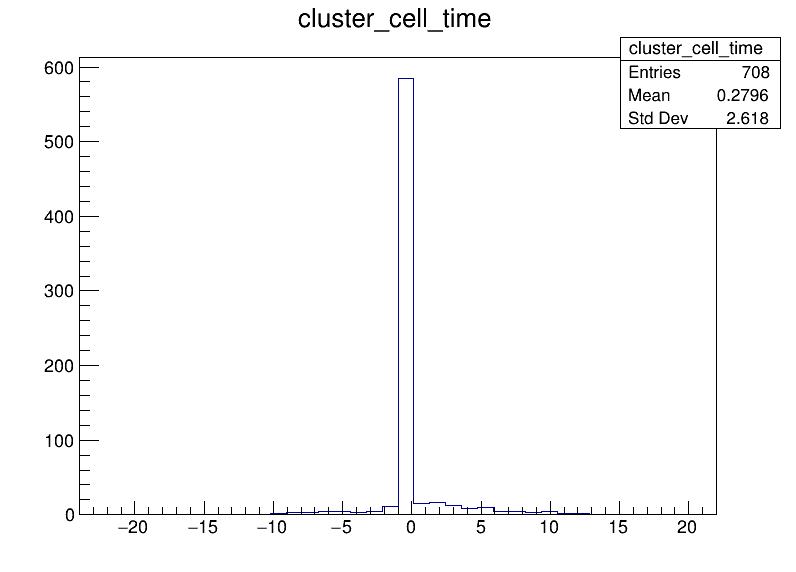

In [58]:
c2 = root.TCanvas("c2", "The Cluster example", 0, 0, 800, 600)
theHistDict = hists['cluster_cell_time']
# theHistDict['hist'].Draw()
# theHistDict['hist'].SetBins(100,-2,0, 10)
theHistDict['hist'].Draw()
# newHist = automaticTH1Rebinning(theHistDict, 60)
# newHist.Draw()
# theHistDict['hist'].Draw("SAME")
c2.Update()
c2.Draw()
c2.Print('aa.png')
# c2 = root.TCanvas("c2", "The Cluster example", 0, 0, 800, 600)
# theHistDict = hists['cluster_cell_time']
# # theHistDict['hist'].Draw()
# # theHistDict['hist'].SetBins(100, -80, 7000)
# theHistDict['hist'].Draw()
# automaticTH1Rebinning(theHistDict, 100)
# c2.Update()
# c2.Draw()

# hist_1 = TH1D(plot_dict['hist_1']['name'],plot_dict['hist_1']['title_and_axis'], nbinsx = (len(bins) -1), xbins = bins) 

TypeError: void TPad::RangeAxis(double xmin, double ymin, double xmax, double ymax) =>
    TypeError: takes at least 4 arguments (0 given)

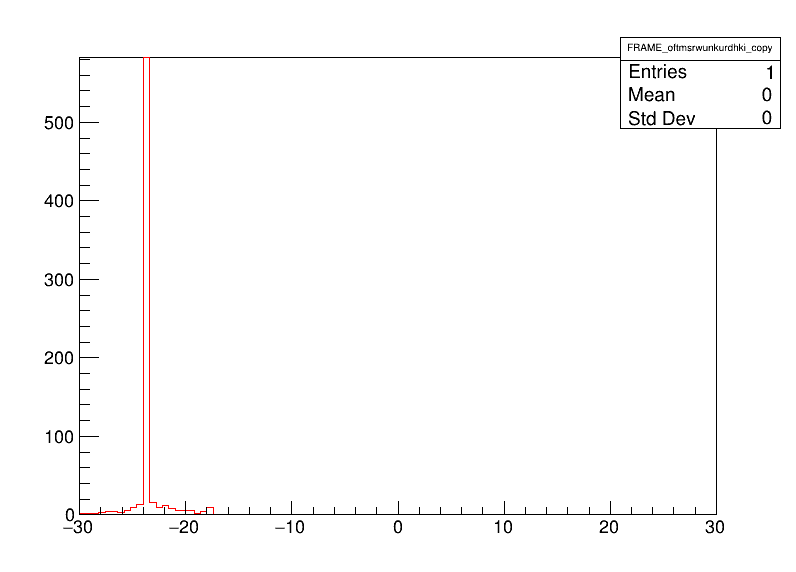

In [122]:
theHistDict = hists['cluster_cell_time']
fig, ax = astyle.subplots()
ax.plot(theHistDict['hist'], linecolor=root.kRed, expand=True)
fig.canvas.Draw("-")
# fig.canvas.Update()
